<a href="https://colab.research.google.com/github/Intelligence-Engineering-LAB-KU/Seminar/blob/master/summer_2020/0721_wschoi_Fourier_anlysis_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as display
from matplotlib.animation import FuncAnimation
from IPython.display import HTML 
    
def plot_signal (x, length):
    plt.plot([x(n) for n in range(length)])
    plt.show()
    
def plot_complex_signal (x, length):
    plt.plot([x(n).real for n in range(length)])
    plt.plot([x(n).imag for n in range(length)])
    plt.show()

## Discrete  Fourier Transformation

**Fourier analysis** is a simple change of basis.
- a change of basis is a change of perspective
- a change of perspective can reveal things
    - if the basis is good enough
        
Overview

1. Fourier basis for $\mathbb{C}^N $
2. Fourier basis is orthogonal 
3. Fourier Analysis 
4. Inverse Transform: Synthesis 

###  1. Fourier Basis For $\mathbb{C}^N $


Fourier basis for $\mathbb{C}^N$ is defined as follows:

$W = \{w_k[n]=e^{j \frac{2\pi}{N}nk} ;n=0,1,...,N-1 | k \in \{0,1,...,N-1\} \}$ 

For example, if N=64 then $w_{5}[n]; n=0,1,...,N-1$ whould be $w_{5}[n]=e^{j \frac{2\pi}{64}5n}$.

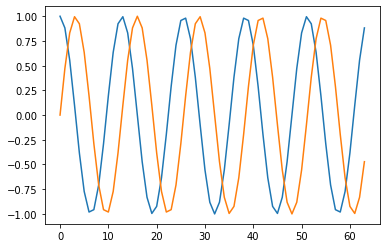

In [2]:
def w_kn(n, N, k):
    return np.exp(1j*2*np.pi*n*k/N)

N=64
k=5

def w_5(n):
    return w_kn(n, 64, 5)

plot_complex_signal(w_5, N)

Visualize the movement of $w_k[n]$ on the complex plane:

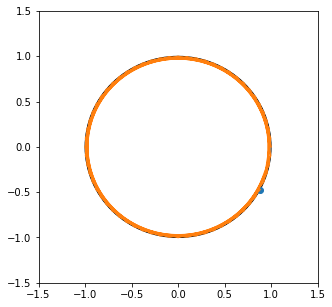

In [3]:
def animate_wkn(k, N):
    ## https://frhyme.github.io/python-libs/plt_matplotlib_animation/
    f, axes = plt.subplots(figsize=(5, 5))

    x_trace, y_trace = [], []
    def animate(n):
        axes.clear()
        axes.set_xlim((-1.5, 1.5))
        axes.set_ylim((-1.5, 1.5))
        xkn = w_kn(n, N, k)
        x_trace.append(xkn.real)
        y_trace.append(xkn.imag)
        axes.plot(x_trace[-1], y_trace[-1], 'o')
        axes.plot(x_trace, y_trace)

        circle = plt.Circle((0, 0), 1,fill=False)
        axes.add_artist(circle)

    ani = FuncAnimation(
        fig=f, func=animate,
        frames=N, 
        blit=False, 
        )

    return HTML(ani.to_jshtml())

animate_wkn(5, 64)

### 2. Fourier Basis is Orthogonal basis

**Claim**: the set $W$ of $N$ signals in $\mathbb{C}^N$ is an orthogonal basis in $\mathbb{C}^N$

, where $W = \{w_k[n]=e^{j \frac{2\pi}{N}nk} ;n=0,1,...,N-1 | k \in \{0,1,...,N-1\} \}$ 


#### Proof of orthogonoality

$ <w^{(k)}, w^{(h)}>$

=$ \Sigma_{n=0}^{N-1}(e^{j \frac{2\pi}{N}nk})^{*}e^{j \frac{2\pi}{N}nh}$

since $e^{-jx}=cos(-x)+jsin(-x)=cos(x) - jsin(x)$, 

$ \Sigma_{n=0}^{N-1}(e^{j \frac{2\pi}{N}nk})^{*}e^{j \frac{2\pi}{N}nh}$

=$ \Sigma_{n=0}^{N-1}(e^{j \frac{2\pi}{N}nk * -1})e^{j \frac{2\pi}{N}nh}$

=$ \Sigma_{n=0}^{N-1}e^{j \frac{2\pi}{N}(h-k)n}$

Now observe that

$ <w^{(k)}, w^{(h)}>$

- if ($h=k$) then $N$
- otherwise $\frac{1-e^{2\pi(h-k)}}{1-e^{2\pi/N(h-k)}}$ = 0

#### Experimental Validation of orthogonoality

In [4]:
for h in range(N):
    for k in range(N):
        w_h = np.array([w_kn(n, N, h) for n in range(N)])
        w_k = np.array([w_kn(n, N, k) for n in range(N)])

        product = np.dot(np.conj(w_h).T, w_k)
        absolute = product.real * product.real + product.imag * product.imag
        print('||<w_', h , ', w_',k, '>||\t=', 'almost 0' if absolute <1e-5 else product )
    break # comment this to check full

||<w_ 0 , w_ 0 >||	= (64+0j)
||<w_ 0 , w_ 1 >||	= almost 0
||<w_ 0 , w_ 2 >||	= almost 0
||<w_ 0 , w_ 3 >||	= almost 0
||<w_ 0 , w_ 4 >||	= almost 0
||<w_ 0 , w_ 5 >||	= almost 0
||<w_ 0 , w_ 6 >||	= almost 0
||<w_ 0 , w_ 7 >||	= almost 0
||<w_ 0 , w_ 8 >||	= almost 0
||<w_ 0 , w_ 9 >||	= almost 0
||<w_ 0 , w_ 10 >||	= almost 0
||<w_ 0 , w_ 11 >||	= almost 0
||<w_ 0 , w_ 12 >||	= almost 0
||<w_ 0 , w_ 13 >||	= almost 0
||<w_ 0 , w_ 14 >||	= almost 0
||<w_ 0 , w_ 15 >||	= almost 0
||<w_ 0 , w_ 16 >||	= almost 0
||<w_ 0 , w_ 17 >||	= almost 0
||<w_ 0 , w_ 18 >||	= almost 0
||<w_ 0 , w_ 19 >||	= almost 0
||<w_ 0 , w_ 20 >||	= almost 0
||<w_ 0 , w_ 21 >||	= almost 0
||<w_ 0 , w_ 22 >||	= almost 0
||<w_ 0 , w_ 23 >||	= almost 0
||<w_ 0 , w_ 24 >||	= almost 0
||<w_ 0 , w_ 25 >||	= almost 0
||<w_ 0 , w_ 26 >||	= almost 0
||<w_ 0 , w_ 27 >||	= almost 0
||<w_ 0 , w_ 28 >||	= almost 0
||<w_ 0 , w_ 29 >||	= almost 0
||<w_ 0 , w_ 30 >||	= almost 0
||<w_ 0 , w_ 31 >||	= almost 0
||<w_ 0 , w_ 32 >||

### 3. Fourier Analysis

We want to represent an arbitrary signal with a Fourier basis.

More technically, we want to represent an arbitrary siganl $x[n]; n=0,1,....,N-1$ as the weighted sum of trigonometric signals (e.g., $w_k[n]$ )

That is, we can re-write $x[n]$  as follows:

$x[n] = \sum_{k=0}^{N-1}X[k]w_k[n]$

Assuming that there exists only one combination of $X[k]; k=0,1,...,N-1$ that satisfies the equation above,

the remaining problem is to determine each $X[k]$.

Using the orthogonality of fourier basis, $<w_k[n], w_h[n]>=0$,

$<w_k[n],x[n]> = <w_k[n],\sum_{h=0}^{N-1}X[h]w_h[n]>$

$=\sum_{h=0}^{N-1}<w_k[n],X[h]w_h[n]>$

$=\sum_{h=0}^{k-1}<w_k[n],X[h]w_h[n]> + X[k]<w_k[n],w_k[n]> + \sum_{h=k+1}^{N-1}<w_k[n],X[k]w_h[n]>$

$=0 + X[k]N + 0$

Thus, $X[k] = \frac{<w_k[n],x[n]>}{N} $

---

**Instead of**  $X[k] = \frac{<w_k[n],x[n]>}{N} $, we will use $X[k]=<w_k[n],x[n]>$ from now on. 

The normalization term $\frac{1}{N}$ **will be taken into account** later in the Synthesis phase.

(i.e., $x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]w_k[n]$)

---

#### example

Suppose that we have a signal x, defined as follows: $x[n] = 3cos(2\pi/16n +  \pi/3)$

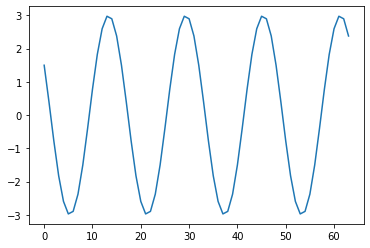

In [5]:
def x(n):
    return 3*np.cos(2*np.pi/16*n + np.pi/3)

N = 64

xn = np.array([x(n) for n in range(N)])
plt.plot(xn)
plt.show()

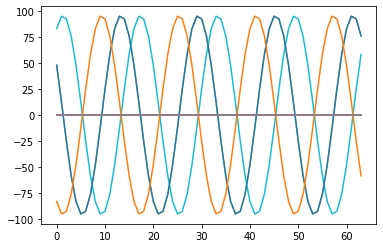

In [6]:
basis = [np.array([w_kn(n, N, k) for n in range(N)]) for k in range(N)]
Xks = [np.dot(w_k.conj().T, xn) for w_k in basis]
for w_k, Xk in zip(basis, Xks):
    plt.plot((Xk*w_k).real)
    plt.plot((Xk*w_k).imag)
plt.show()

###  3. Inverse Transform (Synthesis)

As we mentioned before, we will use $X[k]=<w_k[n],x[n]>$ instead of  $X[k] = \frac{<w_k[n],x[n]>}{N} $.

Since $X[k]=<w_k[n],x[n]>$,

We can re-construct the original signal by

$x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]w_k[n]$

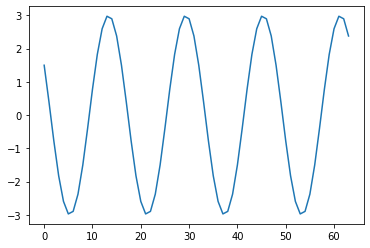

In [7]:
xn_reconstructed = sum([Xk*w_k for Xk, w_k in zip(Xks,basis)]) / N
plt.plot(xn_reconstructed.real)
plt.show()

$x[n] - \frac{1}{N}\sum_{k=0}^{N-1}X[k]w_k[n] ? $

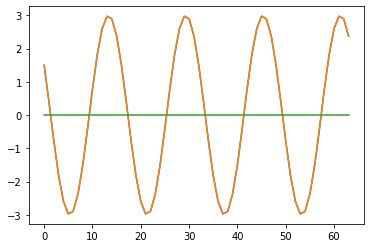

In [8]:
plt.plot(xn)
plt.plot(xn_reconstructed.real)
plt.plot(xn_reconstructed.real - xn)
plt.show()

#### 3.1 Example 1: Decomposition of a sum of two sinusoids

Let $a_{1}[n] = 2cos(\frac{2\pi}{8}n)$ and $a_{2}[n] = cos(\frac{2\pi}{32}n)$





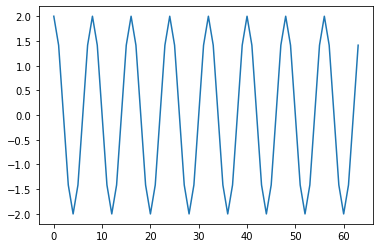

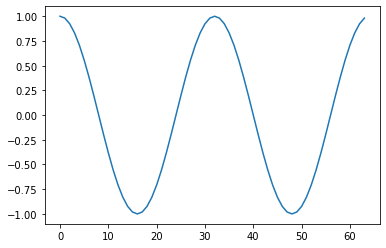

In [9]:
N=64

def a1(n):
  return 2 * np.cos(2*np.pi/8*n)

def a2(n):
  return np.cos(2*np.pi/32*n)

plot_signal(a1, N)
plot_signal(a2, N)

The sum of this two sinusoids $a[n]$ is:

Let $a[n] = a_{1}[n] + a_{2}[n] = 2cos(\frac{2\pi}{8}n) +  cos(\frac{2\pi}{32}n)$

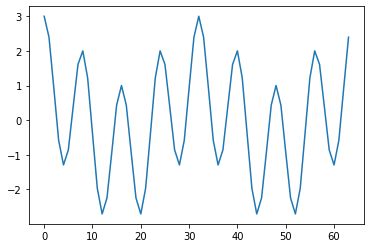

In [10]:
def a(n):
  return a1(n) + a2(n)
plot_signal(a, N)

Let us apply DFT to a[n] where N=64

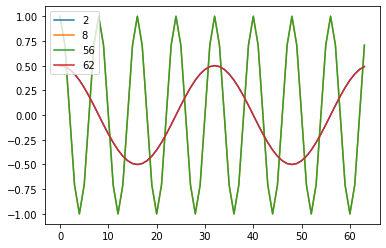

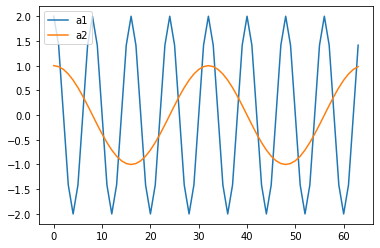

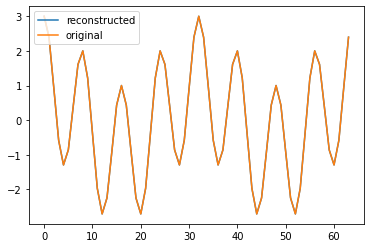

In [11]:
an = np.array([a(n) for n in range(N)])
basis = [np.array([w_kn(n, N, k) for n in range(N)]) for k in range(N)]
Xks = [np.dot(w_k.conj().T, an) for w_k in basis]

## decomposition
for i, (w_k, Xk) in enumerate(zip(basis, Xks)):
    if(Xk.real**2 + Xk.imag**2 > 0.01):
      plt.plot((Xk*w_k).real/N, label=i)
plt.legend(loc='upper left')
plt.show()

## original signal
plt.plot([a1(n) for n in range(N)], label='a1')
plt.plot([a2(n) for n in range(N)], label='a2')
plt.legend(loc='upper left')
plt.show()

## synthesis

xn_reconstructed = sum([Xk*w_k for Xk, w_k in zip(Xks,basis)]) / N
plt.plot(xn_reconstructed.real, label='reconstructed')
plt.plot(an, label='original')
plt.legend(loc='upper left')
plt.show()

#### Example 2: Visualization of how the inverse transformation works 

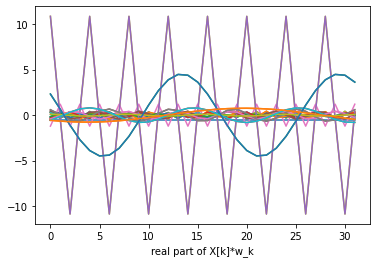

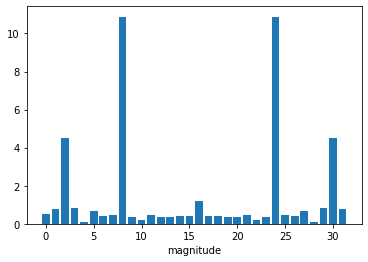

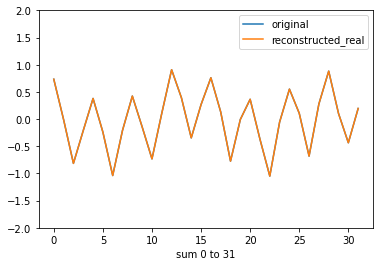

In [12]:
N = 30
def f(n):
    return 0.7*np.cos(8*np.pi/16*n) + 0.3*np.cos(2*np.pi/16*n + np.pi/3) + 0.1 * np.random.randn(1)

def animate_inverse(f, N):
    
    fn = np.array([f(n) for n in range(N)])
    basis = [np.array([w_kn(n, N, k) for n in range(N)]) for k in range(N)]
    Xks = [np.dot(w_k.conj().T, fn) for w_k in basis]

    for w_k, Xk in zip(basis, Xks):
        plt.plot((Xk*w_k).real)
        #plt.plot((Xk*w_k).imag)

    plt.xlabel('real part of X[k]*w_k')
    plt.show()
    plt.bar(range(N), [np.sqrt(Xk.real ** 2 + Xk.imag **2)[0] for Xk in Xks])
    plt.xlabel('magnitude')
    plt.show()    
    
    f, axes = plt.subplots()
    def animate_idft(n):
        axes.clear()

        axes.set_ylim((-2, 2))
        fn_reconstructed = sum([Xk*w_k for Xk, w_k in zip(Xks[:n+1],basis[:n+1])]) / N
        axes.plot(fn, label='original')
        axes.plot(fn_reconstructed.real, label='reconstructed_real')
        #axes.plot(fn_reconstructed.imag, label='reconstructed_imag')
        axes.legend()
        axes.set_xlabel('sum 0 to ' + str(n))


    ani = FuncAnimation(
        fig=f, func=animate_idft,
        frames=N, 
        blit=False, 
        )

    return HTML(ani.to_jshtml())

animate_inverse(f, 32)

## Reference

https://www.coursera.org/learn/dsp1/lecture/qL3Po/1-3-1-b-the-dft-as-a-change-of-basis